## Bildklassifikation - Raffi
### Erkennung von Kreiseln anhand Satelitenbilder

In [3]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt

## Daten Vorbereiten

In [4]:
train_directory = "/home/brunolraphae@edu.local/deep_learning/blatt_5/train"
validation_directory = "/home/brunolraphae@edu.local/deep_learning/blatt_5/validation"
test_directory = "/home/brunolraphae@edu.local/deep_learning/blatt_5/test"

In [3]:
datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)


train_data = datagen.flow_from_directory(
    train_directory,
    target_size = (1250, 1250),
    batch_size = 32,
    class_mode = 'binary',
    shuffle=True,
    seed=123
    )

val_data = datagen.flow_from_directory(
    validation_directory,
    target_size = (1250, 1250),
    batch_size = 32,
    class_mode = 'binary',
    shuffle=False,
    seed=123
    )

test_data = datagen.flow_from_directory(
    test_directory,
    target_size = (1250, 1250),
    batch_size = 32,
    class_mode = 'binary',
    shuffle=False,
    seed=123
    )

Found 400 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [4]:
print("Labels of Train Data Set",train_data.class_indices)
print("Labels of Validation Data Set",val_data.class_indices)
print("Labels of Test Data Set",val_data.class_indices)
print("Number of Training Samples:", train_data.samples)

Labels of Train Data Set {'n': 0, 'y': 1}
Labels of Validation Data Set {'n': 0, 'y': 1}
Labels of Test Data Set {'n': 0, 'y': 1}
Number of Training Samples: 400


## Erstes Modell

In [5]:
base_model = keras.Sequential([
    keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(1250, 1250, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

base_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

2023-06-12 16:59:36.927889: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 78918 MB memory:  -> device: 0, name: NVIDIA A100 80GB PCIe, pci bus id: 0000:c0:00.0, compute capability: 8.0


In [6]:
base_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 1248, 1248, 16)    448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 624, 624, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 622, 622, 32)      4640      
                                                                 
 flatten (Flatten)           (None, 12380288)          0         
                                                                 
 dense (Dense)               (None, 128)               1584676992
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                        

In [7]:
base_model_history = base_model.fit(train_data, epochs=10, validation_data=val_data)

Epoch 1/10


2023-06-02 16:29:35.211447: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-06-02 16:29:39.294289: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-06-02 16:29:40.038718: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-06-02 16:29:41.544257: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-06-02 16:29:41.565296: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7f26580211e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-06-02 16:29:41.565361: I tensorflo

13/13 [==============================] - ETA: 0s - loss: 148.6260 - accuracy: 0.4850

2023-06-02 16:30:06.297721: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


13/13 [==============================] - 37s 2s/step - loss: 148.6260 - accuracy: 0.4850 - val_loss: 15.6338 - val_accuracy: 0.5000
Epoch 2/10
13/13 [==============================] - 27s 2s/step - loss: 4.3879 - accuracy: 0.5000 - val_loss: 0.7850 - val_accuracy: 0.5000
Epoch 3/10
13/13 [==============================] - 27s 2s/step - loss: 0.8934 - accuracy: 0.5025 - val_loss: 0.6921 - val_accuracy: 0.5300
Epoch 4/10
13/13 [==============================] - 26s 2s/step - loss: 0.6471 - accuracy: 0.7350 - val_loss: 0.7494 - val_accuracy: 0.5700
Epoch 5/10
13/13 [==============================] - 25s 2s/step - loss: 0.4034 - accuracy: 0.8700 - val_loss: 0.8845 - val_accuracy: 0.5800
Epoch 6/10
13/13 [==============================] - 27s 2s/step - loss: 0.1353 - accuracy: 0.9650 - val_loss: 1.2174 - val_accuracy: 0.5000
Epoch 7/10
13/13 [==============================] - 25s 2s/step - loss: 0.0431 - accuracy: 0.9925 - val_loss: 0.9677 - val_accuracy: 0.6100
Epoch 8/10
13/13 [==========

In [8]:
acc = base_model_history.history['accuracy']
val_acc = base_model_history.history['val_accuracy']
loss = base_model_history.history['loss']
val_loss = base_model_history.history['val_loss']
epochs = range(1, len(acc)+1)

/tmp/ipykernel_161521/587998028.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'bo', label = 'Trainining Accuracy', color='r')


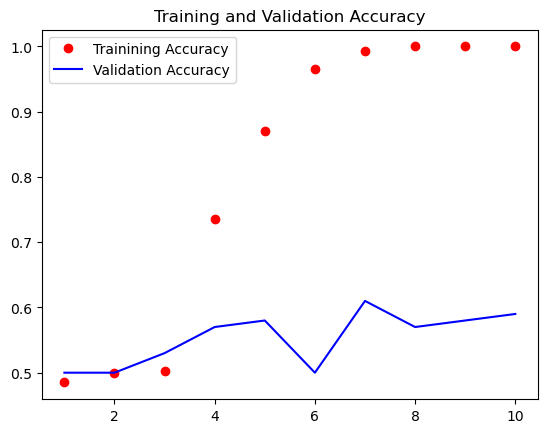

In [9]:
plt.plot(epochs, acc, 'bo', label = 'Trainining Accuracy', color='r')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

/tmp/ipykernel_161521/1645775401.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'bo', label = 'Trainining Loss', color='r')


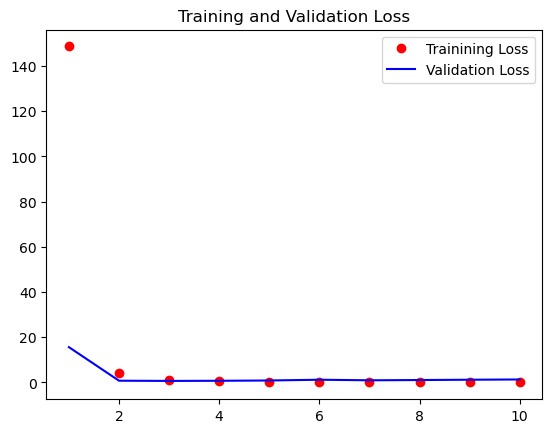

In [10]:
plt.plot(epochs, loss, 'bo', label = 'Trainining Loss', color='r')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [11]:
test_eval = base_model.evaluate(test_data)
test_eval

2023-06-02 16:34:09.688296: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


4/4 [==============================] - 5s 1s/step - loss: 0.7505 - accuracy: 0.7900


[0.7504761219024658, 0.7900000214576721]

/tmp/ipykernel_161521/2002635038.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'bo', label = 'Trainining Accuracy', color='r')


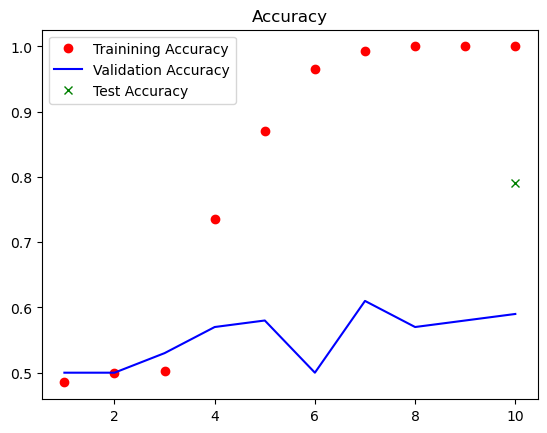

In [12]:
plt.plot(epochs, acc, 'bo', label = 'Trainining Accuracy', color='r')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.plot(10, test_eval[1], 'x', label ='Test Accuracy', color='green')
plt.title('Accuracy')
plt.legend()
plt.show()

## Zweites Modell - mit Data Augmentation

In [14]:
# Data Augmentation im Trainings Data Set
train_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,  # randomly rotate images in the range (0-10 degrees)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    shear_range=0.1,  # apply shear transformation (fraction of total width)
    zoom_range=0.1,  # randomly zoom in on images (range 1-10%)
    horizontal_flip=True,  # randomly flip images horizontally
)

val_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_directory,
    target_size=(1250, 1250),
    batch_size=32,
    class_mode='binary',
    shuffle=True,
    seed=123
)

val_data = val_datagen.flow_from_directory(
    validation_directory,
    target_size=(1250, 1250),
    batch_size=32,
    class_mode='binary',
    shuffle=False,
    seed=123
)

test_data = test_datagen.flow_from_directory(
    test_directory,
    target_size=(1250, 1250),
    batch_size=32,
    class_mode='binary',
    shuffle=False,
    seed=123
)

Found 400 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [14]:
second_model = keras.Sequential([
    keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(1250, 1250, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

second_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
second_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 1248, 1248, 16)    448       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 624, 624, 16)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 622, 622, 32)      4640      
                                                                 
 flatten_1 (Flatten)         (None, 12380288)          0         
                                                                 
 dense_2 (Dense)             (None, 256)               3169353984
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                      

In [16]:
second_model_history = second_model.fit(train_data, epochs=10, validation_data=val_data)

Epoch 1/10


2023-06-02 16:34:24.318590: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


13/13 [==============================] - ETA: 0s - loss: 249.9957 - accuracy: 0.4950

2023-06-02 16:36:19.840445: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


13/13 [==============================] - 121s 9s/step - loss: 249.9957 - accuracy: 0.4950 - val_loss: 5.9027 - val_accuracy: 0.5000
Epoch 2/10
13/13 [==============================] - 102s 8s/step - loss: 1.7625 - accuracy: 0.5625 - val_loss: 0.7281 - val_accuracy: 0.5500
Epoch 3/10
13/13 [==============================] - 125s 10s/step - loss: 0.5567 - accuracy: 0.7500 - val_loss: 0.7580 - val_accuracy: 0.5100
Epoch 4/10
13/13 [==============================] - 101s 8s/step - loss: 0.4952 - accuracy: 0.8075 - val_loss: 0.7469 - val_accuracy: 0.5700
Epoch 5/10
13/13 [==============================] - 116s 9s/step - loss: 0.4939 - accuracy: 0.7875 - val_loss: 1.0308 - val_accuracy: 0.4900
Epoch 6/10
13/13 [==============================] - 101s 8s/step - loss: 0.4386 - accuracy: 0.8275 - val_loss: 0.9523 - val_accuracy: 0.5700
Epoch 7/10
13/13 [==============================] - 102s 8s/step - loss: 0.4502 - accuracy: 0.8450 - val_loss: 1.0415 - val_accuracy: 0.5400
Epoch 8/10
13/13 [===

In [17]:
test_eval = second_model.evaluate(test_data)
test_eval 

2023-06-02 16:52:23.613803: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


4/4 [==============================] - 6s 1s/step - loss: 0.9351 - accuracy: 0.5700


[0.9351322054862976, 0.5699999928474426]

## Drittes Modell: Pretrained Model

In [5]:
# Load Convolutional Base
conv_base = tf.keras.applications.VGG16(weights='imagenet',
                                        include_top=False,
                                        input_shape=(750,750,3))

2023-06-12 17:55:32.746215: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 78918 MB memory:  -> device: 0, name: NVIDIA A100 80GB PCIe, pci bus id: 0000:c0:00.0, compute capability: 8.0


In [6]:
print(conv_base.summary())

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 750, 750, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 750, 750, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 750, 750, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 375, 375, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 375, 375, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 375, 375, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 187, 187, 128)     0     

In [7]:
# Model building
model = tf.keras.models.Sequential()
model.add(conv_base)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [6]:
print('This is the number of trainable weights '
      'before freezing the conv base: ', len(model.trainable_variables))
# Oha! wir müssen noch die Convolutional Base freezen!

This is the number of trainable weights before freezing the conv base:  30


In [8]:
# Freezing the convolutional base layer SUPER WICHTIG
conv_base.trainable = False

In [8]:
print(conv_base.summary())
# Trainable params: 0 --> sehr gut

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 750, 750, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 750, 750, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 750, 750, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 375, 375, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 375, 375, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 375, 375, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 187, 187, 128)     0     

In [13]:
datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_data = datagen.flow_from_directory(
    train_directory,
    target_size=(750, 750),  # Neue Zielgröße
    batch_size=8,
    class_mode='binary',
    shuffle=True,
    seed=123
)

val_data = datagen.flow_from_directory(
    validation_directory,
    target_size=(750, 750),  # Neue Zielgröße
    batch_size=8,
    class_mode='binary',
    shuffle=False,
    seed=123
)

test_data = datagen.flow_from_directory(
    test_directory,
    target_size=(750, 750),  # Neue Zielgröße
    batch_size=8,
    class_mode='binary',
    shuffle=False,
    seed=123
)

# Load Convolutional Base
conv_base = tf.keras.applications.VGG16(weights='imagenet',
                                        include_top=False,
                                        input_shape=(750, 750, 3))  # Neue Eingabeform


# Model building
model = tf.keras.models.Sequential()
model.add(conv_base)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Freezing the convolutional base layer
conv_base.trainable = False

# Compile model
model.compile(loss='binary_crossentropy',
              metrics=['acc'],
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=2e-5))

# Fit Model
history = model.fit(
    train_data,
    epochs=30,
    validation_data=val_data
)

Found 400 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Epoch 1/30


2023-06-12 18:04:03.600264: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


50/50 [==============================] - ETA: 0s - loss: 0.8666 - acc: 0.6375

2023-06-12 18:04:20.409137: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


50/50 [==============================] - 21s 409ms/step - loss: 0.8666 - acc: 0.6375 - val_loss: 0.7333 - val_acc: 0.6700
Epoch 2/30
50/50 [==============================] - 20s 406ms/step - loss: 0.5111 - acc: 0.7625 - val_loss: 0.9719 - val_acc: 0.6700
Epoch 3/30
50/50 [==============================] - 22s 430ms/step - loss: 0.3998 - acc: 0.8225 - val_loss: 0.6465 - val_acc: 0.6700
Epoch 4/30
50/50 [==============================] - 22s 433ms/step - loss: 0.3566 - acc: 0.8400 - val_loss: 0.7036 - val_acc: 0.6500
Epoch 5/30
50/50 [==============================] - 20s 398ms/step - loss: 0.2505 - acc: 0.8800 - val_loss: 0.8188 - val_acc: 0.6800
Epoch 6/30
50/50 [==============================] - 20s 399ms/step - loss: 0.2040 - acc: 0.9175 - val_loss: 0.7730 - val_acc: 0.7100
Epoch 7/30
50/50 [==============================] - 21s 414ms/step - loss: 0.1246 - acc: 0.9500 - val_loss: 0.7297 - val_acc: 0.6300
Epoch 8/30
50/50 [==============================] - 21s 412ms/step - loss: 0.121

In [14]:
test_eval = model.evaluate(test_data)
test_eval

2023-06-12 18:14:51.212011: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


13/13 [==============================] - 5s 380ms/step - loss: 0.7009 - acc: 0.8300


[0.700927197933197, 0.8299999833106995]

In [24]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc)+1)

/tmp/ipykernel_859916/1883746339.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'bo', label = 'Trainining Accuracy', color='r')


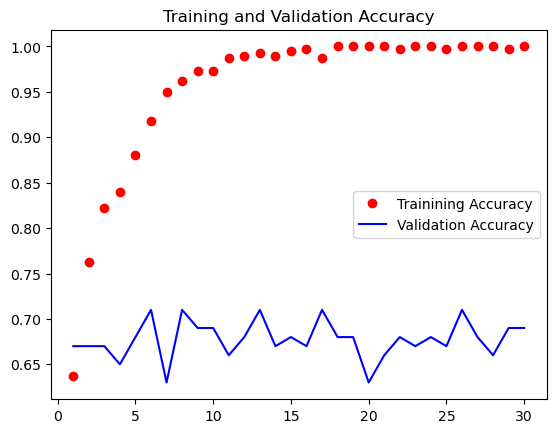

In [29]:
plt.plot(epochs, acc, 'bo', label = 'Trainining Accuracy', color='r')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
# plt.plot(30, test_eval[1], 'x', label= 'Test Accuracy', color='green')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

/tmp/ipykernel_859916/1645775401.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'bo', label = 'Trainining Loss', color='r')


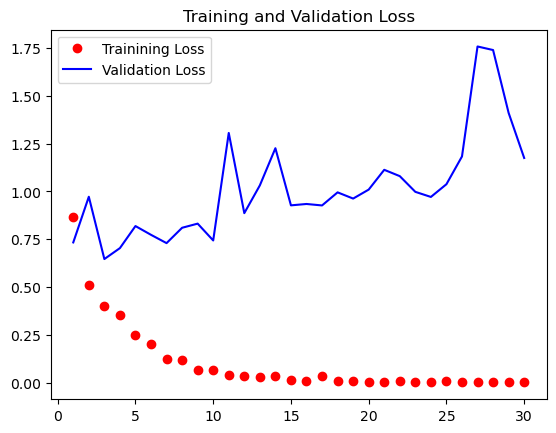

In [26]:
plt.plot(epochs, loss, 'bo', label = 'Trainining Loss', color='r')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

/tmp/ipykernel_859916/5804138.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'bo', label = 'Trainining Accuracy', color='r')


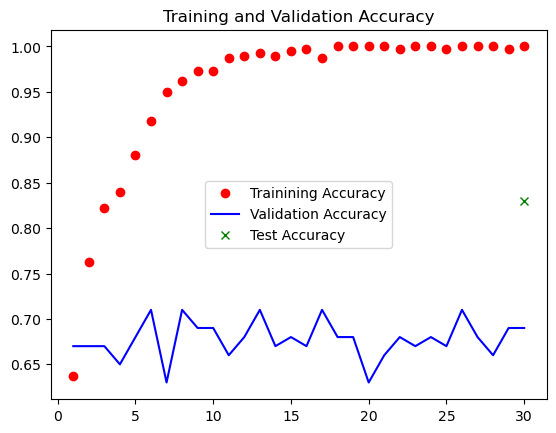

In [30]:
plt.plot(epochs, acc, 'bo', label = 'Trainining Accuracy', color='r')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.plot(30, test_eval[1], 'x', label= 'Test Accuracy', color='green')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()